<a href="https://colab.research.google.com/github/shivangi-975/Data-Preparation-for-ML/blob/main/Encoding_of_data(LabelEncoderAndOneHotEncoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing library

In [ ]:
import pandas as pd

### GoSales Dataset
Source: https://raw.githubusercontent.com/sandra-calvo/machine-learning-DSX/master/GoSales_Tx_LogisticRegression.csv

Datafields: https://developer.ibm.com/dwblog/2017/watson-machine-learning-within-ibm-data-science-experience/

* IS_TENT : It has the value TRUE or FALSE which tells us if a customer has bought a tent or not.   
* GENDER : Customer's gender  
* AGE : Customer's age (F, M)  
* MARITAL_STATUS : Customer's marital status ('married', 'single', 'unspecified')  
* PROFESSION : Customer's profession ('Professional', 'Other', 'Hospitality', 'Retired', 'Retail', 'Sales', 'Trades', 'Student', 'Executive') 

In [ ]:
gosales = pd.read_csv('datasets/GoSales_Tx_LogisticRegression.csv')

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
27805,False,M,21,Single,Executive
2671,False,F,37,Unspecified,Hospitality
8908,False,M,44,Married,Professional
16773,False,F,38,Married,Professional
41792,False,F,37,Married,Other
24858,True,M,20,Single,Sales
16833,False,F,43,Married,Professional
26552,False,M,36,Single,Sales
32526,True,M,25,Single,Other
28124,False,M,42,Married,Other


In [ ]:
gosales.shape

(60252, 5)

#### Describe age column

In [ ]:
gosales.AGE.describe()

count    60252.000000
mean        34.187479
std         10.105477
min         17.000000
25%         26.000000
50%         33.000000
75%         41.000000
max         69.000000
Name: AGE, dtype: float64

#### Plot bar graph for categorical values

In [ ]:
import matplotlib.pyplot as plt

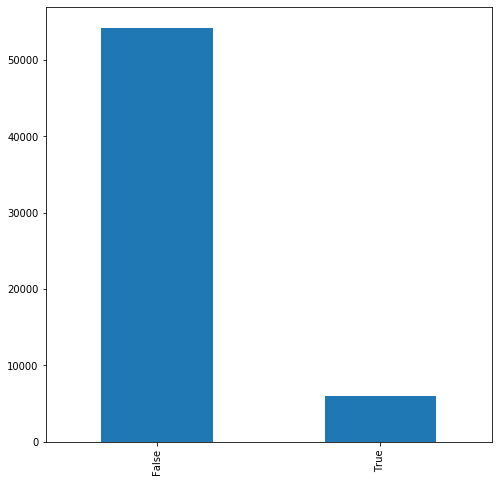

In [ ]:
plt.figure(figsize=(8, 8))

pd.value_counts(gosales['IS_TENT']).plot.bar()

plt.show()

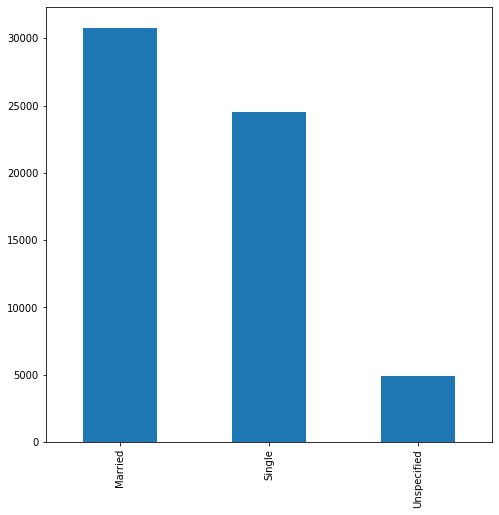

In [ ]:
plt.figure(figsize=(8, 8))

pd.value_counts(gosales['MARITAL_STATUS']).plot.bar()

plt.show()

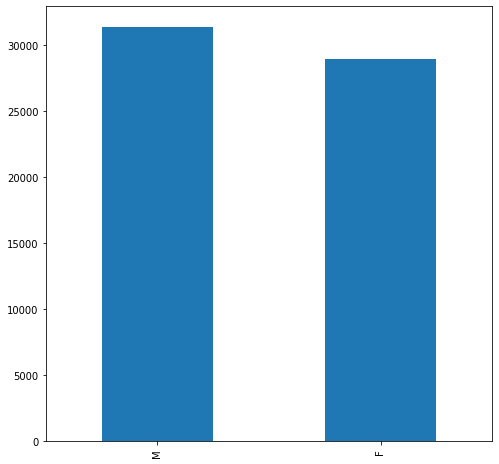

In [ ]:
plt.figure(figsize=(8, 8))
pd.value_counts(gosales['GENDER']).plot.bar()
plt.show()

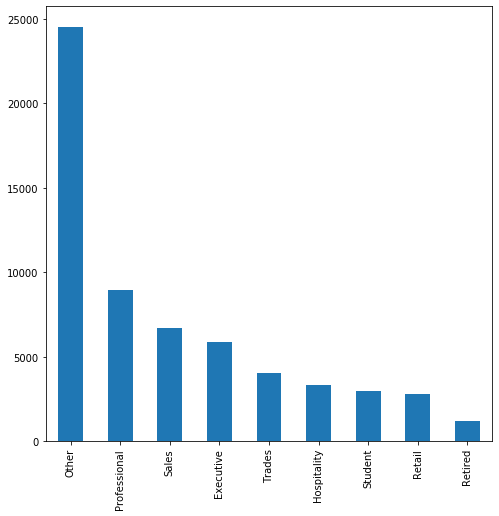

In [ ]:
plt.figure(figsize=(8, 8))
pd.value_counts(gosales['PROFESSION']).plot.bar()
plt.show()

### Label Encoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

##### Here we are applying label encoding on 'GENDER' column

In [ ]:
gender = ['M', 'F']

In [ ]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

label_encoding = label_encoding.fit(gender)

In [ ]:
gosales['GENDER'] = label_encoding.transform(gosales['GENDER'].astype(str))

In [ ]:
label_encoding.classes_

array(['F', 'M'], dtype='<U1')

In [ ]:
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
32268,False,0,34,Unspecified,Hospitality
31094,False,0,20,Single,Student
20785,False,1,18,Single,Student
14913,False,0,28,Single,Student
24590,False,1,23,Single,Sales
9565,False,0,36,Married,Executive
17803,True,1,31,Married,Trades
58868,False,0,35,Married,Other
36107,False,1,42,Single,Sales
7522,False,1,39,Married,Other


### One-hot Encoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
gosales[['MARITAL_STATUS']].sample(5)

,MARITAL_STATUS
46037,Married
7932,Married
4402,Married
17568,Unspecified
44125,Single


In [ ]:
one_hot_encoding = preprocessing.OneHotEncoder()

one_hot_encoding = one_hot_encoding.fit(gosales['MARITAL_STATUS'].values.reshape(-1, 1))

In [ ]:
one_hot_encoding.categories_

[array(['Married', 'Single', 'Unspecified'], dtype=object)]

In [ ]:
one_hot_labels = one_hot_encoding.transform(gosales['MARITAL_STATUS'].values.reshape(-1, 1)).toarray()

one_hot_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
one_hot_labels.shape

(60252, 3)

#### Creating a dataframe for encoded values

In [ ]:
one_hot_labels[:,0]

array([0., 1., 1., ..., 1., 0., 1.])

In [ ]:
labels_df = pd.DataFrame()

labels_df['MARITAL_STATUS_Married'] = one_hot_labels[:,0]
labels_df['MARITAL_STATUS_Single'] = one_hot_labels[:,1]
labels_df['MARITAL_STATUS_Unspecified'] = one_hot_labels[:,2]

labels_df.head(10)

,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


#### Concatenate the one hot_encoded columns with original dataset and dropping the original MARITAL_STATUS column

In [ ]:
encoded_df = pd.concat([gosales, labels_df], axis=1)
encoded_df.drop('MARITAL_STATUS', axis=1, inplace=True)

In [ ]:
encoded_df.sample(10)

,IS_TENT,GENDER,AGE,PROFESSION,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
14790,False,1,18,Student,0.0,1.0,0.0
5897,False,0,29,Other,0.0,1.0,0.0
5031,False,1,29,Student,0.0,1.0,0.0
51728,False,1,40,Sales,1.0,0.0,0.0
39546,False,0,30,Other,1.0,0.0,0.0
6941,False,1,42,Other,1.0,0.0,0.0
54356,False,0,63,Hospitality,0.0,0.0,1.0
48011,False,0,43,Hospitality,0.0,0.0,1.0
14575,False,0,34,Other,1.0,0.0,0.0
51514,False,0,46,Executive,1.0,0.0,0.0





#### We can do one hot encoding using the pandas get_dummies( ) function

In [ ]:
gosales = pd.get_dummies(encoded_df, columns=['PROFESSION'])

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
50699,False,1,37,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
13923,False,0,29,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0
2284,False,0,23,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0
53238,False,0,29,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
1710,False,1,23,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
54567,True,1,29,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1
2177,False,0,36,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0
47495,True,1,24,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
29539,False,0,26,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
55143,False,0,30,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0


### Using pandas get_dummies( ) function we can scale the whole data

##### So here we are loading dataset again and then applying one hot encoding on the whole dataset

In [ ]:
gosales = pd.read_csv('datasets/GoSales_Tx_LogisticRegression.csv')

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
56845,False,F,33,Married,Other
12493,False,M,25,Single,Student
37217,True,M,44,Married,Other
19539,False,F,49,Married,Professional
20574,True,M,35,Married,Sales
26496,False,F,23,Single,Student
46491,False,F,35,Single,Professional
40282,False,F,29,Single,Professional
19365,False,M,41,Unspecified,Other
28942,False,F,39,Married,Other


In [ ]:
gosales = pd.get_dummies(gosales)

gosales.sample(10)

,IS_TENT,AGE,GENDER_F,GENDER_M,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
44591,True,34,0,1,0,1,0,0,0,0,1,0,0,0,0,0
31086,False,32,0,1,1,0,0,0,0,1,0,0,0,0,0,0
9611,False,34,0,1,1,0,0,0,0,0,0,0,0,1,0,0
48641,False,29,0,1,1,0,0,0,0,1,0,0,0,0,0,0
55724,False,23,1,0,1,0,0,0,0,0,0,1,0,0,0,0
6404,False,38,0,1,1,0,0,0,0,1,0,0,0,0,0,0
27872,False,31,1,0,1,0,0,0,0,1,0,0,0,0,0,0
27775,False,61,1,0,1,0,0,0,0,0,0,0,1,0,0,0
59531,False,38,0,1,1,0,0,1,0,0,0,0,0,0,0,0
59202,False,34,0,1,1,0,0,0,0,1,0,0,0,0,0,0
